In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data collect and preprocessing

In [159]:
#load the data from csv file into pandas dataframe.
df = pd.read_csv('./titanic.csv')
#Print first 6 rows of dataset.
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [160]:
#print number of rows and columns in that dataset.
df.shape

(1310, 14)

In [161]:
#Print name of the all columns. 
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

This dataset contain 1310 rows and 14 columns. 

In [162]:
#Print more information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


This dataset contain 1310 rows and 14 columns.

In [163]:
#Cheack the number of duplicate rows in dataset.
df.duplicated().sum()

0

There are no duplicate values in that dataset.

In [164]:
#Chech the number of missing values in each column. 
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

This dataset contain some missing values.

## Handling the missing values.

In [165]:
#drop the cabin, home.dest name columns.
df.drop(columns = ['cabin', 'name', 'home.dest'], axis = 1, inplace = True)

In [166]:
# replacing the missing values in pclass, age, sibsp, parch, fare, body columns with its mean values
df['pclass'].fillna(df['pclass'].mean(), inplace = True)
df['age'].fillna(df['age'].mean(), inplace = True)
df['sibsp'].fillna(df['sibsp'].mean(), inplace = True)
df['parch'].fillna(df['parch'].mean(), inplace = True)
df['fare'].fillna(df['fare'].mean(), inplace = True)
df['body'].fillna(df['body'].mean(), inplace = True)

In [167]:
#print mode value of sex column.
print(df['sex'].mode())
print(df['sex'].mode()[0])

0    male
Name: sex, dtype: object
male


In [168]:
#print mode value of ticket column.
print(df['ticket'].mode())
print(df['ticket'].mode()[0])

0    CA. 2343
Name: ticket, dtype: object
CA. 2343


In [169]:
#print mode value of embarked column.
print(df['embarked'].mode())
print(df['embarked'].mode()[0])

0    S
Name: embarked, dtype: object
S


In [170]:
#print mode value of boat column.
print(df['boat'].mode())
print(df['boat'].mode()[0])

0    13
Name: boat, dtype: object
13


In [171]:
# replacing the missing values in sex, ticket, embarked, boat, home.dest columns with its mode values
df['sex'].fillna(df['sex'].mode()[0], inplace = True)
df['ticket'].fillna(df['ticket'].mode()[0], inplace = True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
df['boat'].fillna(df['boat'].mode()[0], inplace = True)

In [172]:
#Chech the number of missing values in each column.
df.isnull().sum()

pclass      0
survived    1
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
boat        0
body        0
dtype: int64

In [173]:
#drop the row missing value contain column survived.
df.dropna(axis = 0, inplace = True)

In [174]:
#Chech the number of missing values in each column.
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
boat        0
body        0
dtype: int64

Now it doesn't contain missing values.

In [175]:
#print number of rows and columns in that dataset.
df.shape

(1309, 11)

Now it contain 1309 rows and 12 columns.

In [176]:
#Get description about dataset.
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879,29.591544
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,160.809917
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,160.809917
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,160.809917
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Categorical features representing using bargraph.

Sex

ticket

Embarked

boat


male      843
female    466
Name: sex, dtype: int64


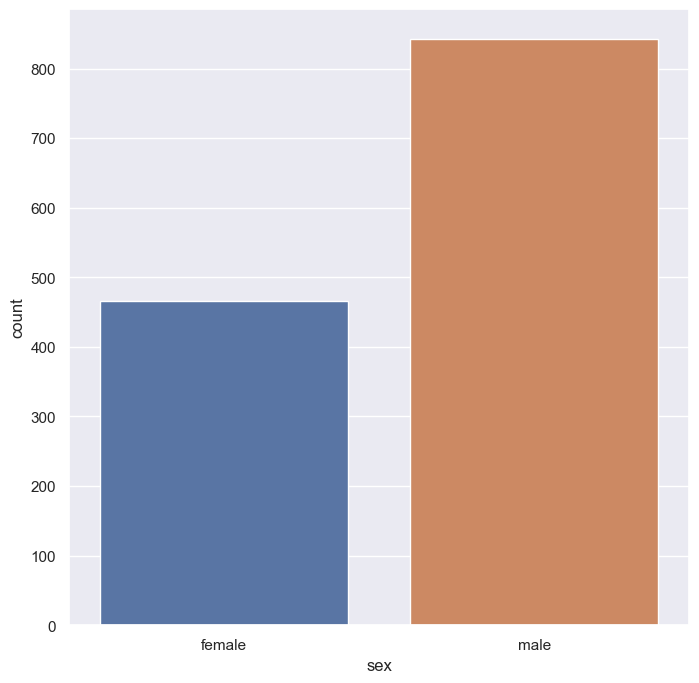

In [177]:
print(df['sex'].value_counts())


sns.set()
plt.figure(figsize = (8, 8))
sns.countplot(x = 'sex', data = df)
plt.show()

In [178]:
print(df['ticket'].value_counts())

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64


S    916
C    270
Q    123
Name: embarked, dtype: int64


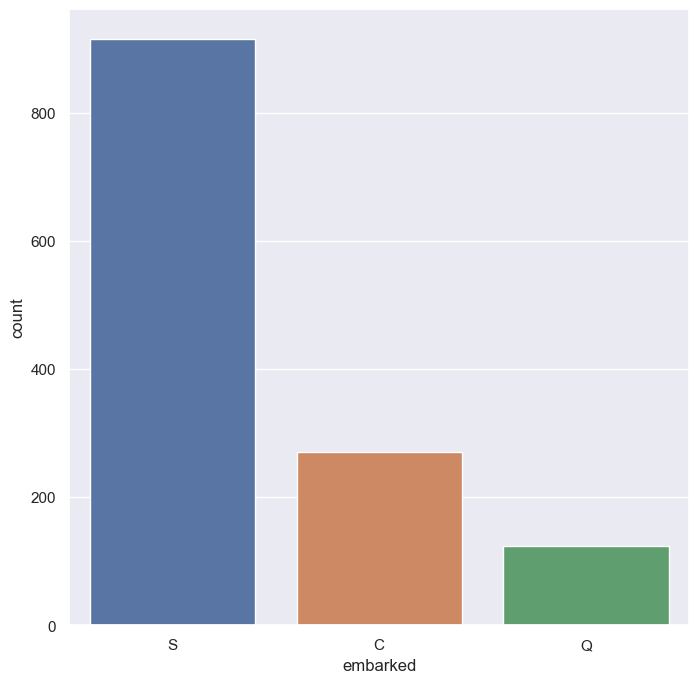

In [179]:
print(df['embarked'].value_counts())

sns.set()
plt.figure(figsize = (8, 8))
sns.countplot(x = 'embarked', data = df)
plt.show()

13         862
C           38
15          37
14          33
4           31
10          29
5           27
3           26
9           25
11          25
7           23
16          23
8           23
D           20
6           20
12          19
2           13
A           11
B            9
1            5
5 7          2
C D          2
13 15        2
5 9          1
8 10         1
13 15 B      1
15 16        1
Name: boat, dtype: int64


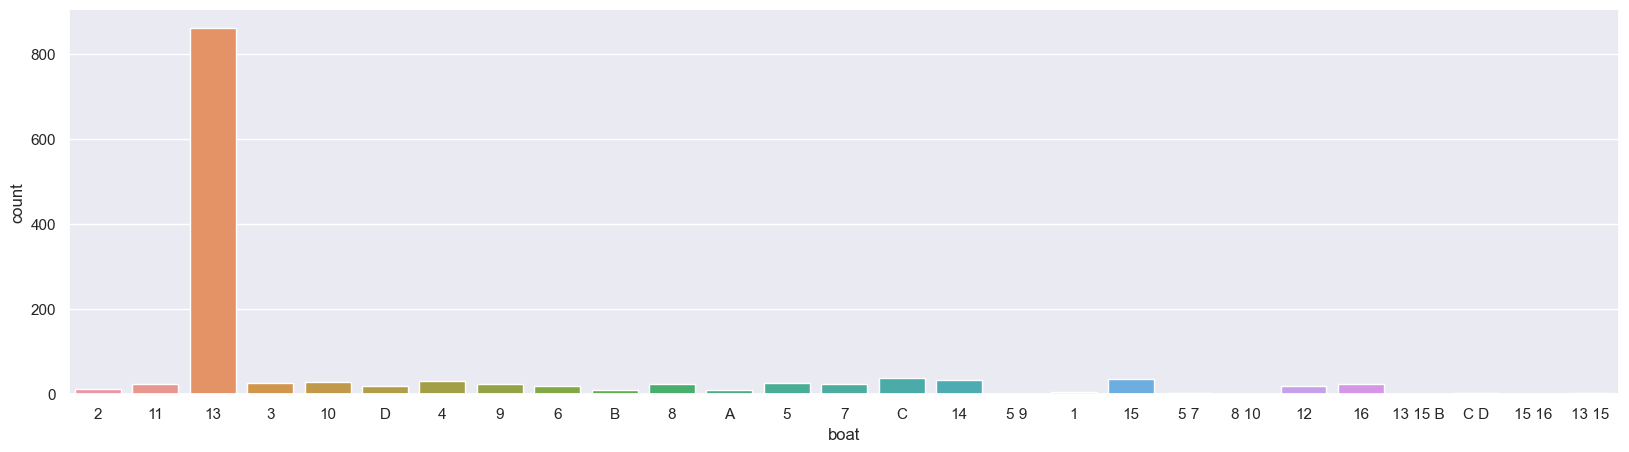

In [180]:
print(df['boat'].value_counts())

sns.set()
plt.figure(figsize = (20, 5))
sns.countplot(x = 'boat', data = df)
plt.show()

In [181]:
df.head(6)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,2,160.809917
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,11,160.809917
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,13,160.809917
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,13,135.000000
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,13,160.809917
5,1.0,1.0,male,48.0000,0.0,0.0,19952,26.5500,S,3,160.809917


In [182]:
df.dtypes

pclass      float64
survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
boat         object
body        float64
dtype: object

In [183]:
#replace categorical values with numerical values.
df.replace({'sex':{'male' : 1, 'female' : 2}}, inplace = True)
df.replace({'embarked':{'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [184]:
#Encode the categorical value

lb = LabelEncoder()
df['boat1'] = lb.fit_transform(df[['boat']])
print(df['boat1'].head(6))

i = np.sort(df['boat'].unique())
i

j = 0
print("--------------------------------------------------------------------------------------------------------------------------")
for k in i:
    print(k ," ----> ", j)
    print(" ")
    j = j + 1

0    11
1     2
2     4
3     4
4     4
5    12
Name: boat1, dtype: int32
--------------------------------------------------------------------------------------------------------------------------
1  ---->  0
 
10  ---->  1
 
11  ---->  2
 
12  ---->  3
 
13  ---->  4
 
13 15  ---->  5
 
13 15 B  ---->  6
 
14  ---->  7
 
15  ---->  8
 
15 16  ---->  9
 
16  ---->  10
 
2  ---->  11
 
3  ---->  12
 
4  ---->  13
 
5  ---->  14
 
5 7  ---->  15
 
5 9  ---->  16
 
6  ---->  17
 
7  ---->  18
 
8  ---->  19
 
8 10  ---->  20
 
9  ---->  21
 
A  ---->  22
 
B  ---->  23
 
C  ---->  24
 
C D  ---->  25
 
D  ---->  26
 


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
df.drop(columns = 'boat', axis =  1, inplace =True)
df.head(50)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,body,boat1
0,1.0,1.0,2,29.000000,0.0,0.0,24160,211.3375,0,160.809917,11
1,1.0,1.0,1,0.916700,1.0,2.0,113781,151.5500,0,160.809917,2
2,1.0,0.0,2,2.000000,1.0,2.0,113781,151.5500,0,160.809917,4
3,1.0,0.0,1,30.000000,1.0,2.0,113781,151.5500,0,135.000000,4
4,1.0,0.0,2,25.000000,1.0,2.0,113781,151.5500,0,160.809917,4
5,1.0,1.0,1,48.000000,0.0,0.0,19952,26.5500,0,160.809917,12
6,1.0,1.0,2,63.000000,1.0,0.0,13502,77.9583,0,160.809917,1
7,1.0,0.0,1,39.000000,0.0,0.0,112050,0.0000,0,160.809917,4
8,1.0,1.0,2,53.000000,2.0,0.0,11769,51.4792,0,160.809917,26
9,1.0,0.0,1,71.000000,0.0,0.0,PC 17609,49.5042,1,22.000000,4


## Data modelling

In [187]:
x = df.drop(columns = 'survived', axis = 1)
y = df['survived']

In [188]:
x.head(6)

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,body,boat1
0,1.0,2,29.0000,0.0,0.0,24160,211.3375,0,160.809917,11
1,1.0,1,0.9167,1.0,2.0,113781,151.5500,0,160.809917,2
2,1.0,2,2.0000,1.0,2.0,113781,151.5500,0,160.809917,4
3,1.0,1,30.0000,1.0,2.0,113781,151.5500,0,135.000000,4
4,1.0,2,25.0000,1.0,2.0,113781,151.5500,0,160.809917,4
5,1.0,1,48.0000,0.0,0.0,19952,26.5500,0,160.809917,12


In [189]:
y.head(6)

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: survived, dtype: float64

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 4)